# **Final Project Task 3 - Census Modeling Regression**

Requirements
- Create a regression model on the Census dataset, with 'hours-per-week' target

- You can use models (estmators) from sklearn, but feel free to use any library for traditional ML. 
    - Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent. 
    - You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.

- Model Selection and Setup:
    - Implement multiple models, to solve a regression problem using traditional ML:
        - Linear Regression
        - Decision Tree Regression
        - Random Forest Regression - Optional
        - Ridge Regression - Optional
        - Lasso Regression - Optional
    - Choose a loss (or experiment with different losses) for the model and justify the choice.
        - MSE, MAE, RMSE, Huber Loss or others
    - Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.


- Data Preparation
    - Use the preprocessed datasets from Task 1.
    - From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
    - Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.


- Model Training and Experimentation
    - Establish a Baseline Model:
        - For each model type, train a simple model with default settings as a baseline.
        - Evaluate its performance to establish a benchmark for comparison.
    - Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
    - Feature Selection:
        - Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
    - Experimentation:
        - For each baseline model type, iteratively experiment with different combinations of features and transformations.
        - Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
        - Identify the best model which have the best performance metrics on test set.
    - Hyperparameter Tuning - Optional:
        - Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
        - Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
        - Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
        - Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.


- Model Evaluation
    - Evaluate models on the test dataset using regression metrics:
        - Mean Absolute Error (MAE)
        - Mean Squared Error (MSE)
        - Root Mean Squared Error (RMSE)
        - RÂ² Score
    - Choose one metric for model comparison and explain your choice
    - Compare the results across different models. Save all experiment results into a table.

Feature Importance - Optional
- For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.



Deliverables

- Notebook code with no errors.
- Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
- Explain findings, choices, results.
- Potential areas for improvement or further exploration.


In [24]:
import pandas as pd

In [25]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age  workclass  fnlwgt  education  education-num      marital-status  \
29618   44    Private  408531    HS-grad              9            Divorced   
8442    47    Private  168262    Masters             14           Separated   
22691   49    Private  139268    HS-grad              9  Married-civ-spouse   
20289   40    Private  283724        9th              5       Never-married   
10573   44  State-gov  180609    HS-grad              9  Married-civ-spouse   
4557    33    Private  208180  Bachelors             13       Never-married   
13692   38  State-gov  318886  Bachelors             13  Married-civ-spouse   
15370   39    Private  195253    HS-grad              9  Married-civ-spouse   
11196   73    Private  139978       11th              7  Married-civ-spouse   
20174   21    Private  207103    HS-grad              9       Never-married   

              occupation    relationship   race     sex  capital-gain  \
29618       Adm-clerical       Unmarried  White  Female             0   
8442     Exec-managerial   Not-in-family  White    Male         99999   
22691       Craft-repair         Husband  White    Male          7298   
20289       Craft-repair  Other-relative  Black    Male             0   
10573    Protective-serv         Husband  White    Male             0   
4557               Sales   Not-in-family  White  Female             0   
13692    Protective-serv         Husband  Black    Male             0   
15370  Machine-op-inspct         Husband  White    Male             0   
11196  Machine-op-inspct         Husband  White    Male             0   
20174  Handlers-cleaners       Own-child  White    Male             0   

       capital-loss  hours-per-week native-country income  
29618             0              40  United-States   >50K  
8442              0              50  United-States   >50K  
22691             0              40  United-States   >50K  
20289             0              49  United-States  <=50K  
10573             0              40  United-States  <=50K  
4557              0              40  United-States  <=50K  
13692             0              52  United-States  <=50K  
15370             0              40  United-States   >50K  
11196             0              40  United-States  <=50K  
20174             0              40  United-States  <=50K

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "SGDRegressor": SGDRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),  # Optional
    "RidgeRegression": Ridge(random_state=42),  # Optional
    "LassoRegression": Lasso(random_state=42)  # Optional
}

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Manually calculate RMSE
    r2 = r2_score(y_true, y_pred)
    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    results[name] = evaluate_model(y_val, y_val_pred)

results_df = pd.DataFrame(results).T
print(results_df)

c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                            MAE         MSE       RMSE        R2
SGDRegressor           7.254360  104.055011  10.200736  0.202935
LinearRegression       7.247841  103.753139  10.185928  0.205247
DecisionTreeRegressor  9.610823  197.361393  14.048537 -0.511796
RandomForestRegressor  7.073610   99.694368   9.984707  0.236337
RidgeRegression        7.245563  103.727130  10.184652  0.205446
LassoRegression        7.161292  124.874004  11.174704  0.043460


In [28]:
correlation_with_target = X_train.corrwith(y_train["hours-per-week"].squeeze())
selected_features = correlation_with_target[abs(correlation_with_target) > 0.1].index

X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Dan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_val_poly = poly.transform(X_val_selected)
X_test_poly = poly.transform(X_test_selected)

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": [0.0001, 0.001, 0.01],
    "max_iter": [1000, 2000],
    "learning_rate": ["constant", "adaptive"]
}

grid_search = GridSearchCV(SGDRegressor(random_state=42), param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train_poly, y_train["hours-per-week"])

print(grid_search.best_params_)

{'alpha': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000}


In [31]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_poly, y_train["hours-per-week"])

y_test_pred = best_model.predict(X_test_poly)
test_results = evaluate_model(y_test["hours-per-week"], y_test_pred)
print(test_results)

{'MAE': 7.169753174091851, 'MSE': 102.47034500101326, 'RMSE': np.float64(10.122763703703315), 'R2': 0.23696442127770379}


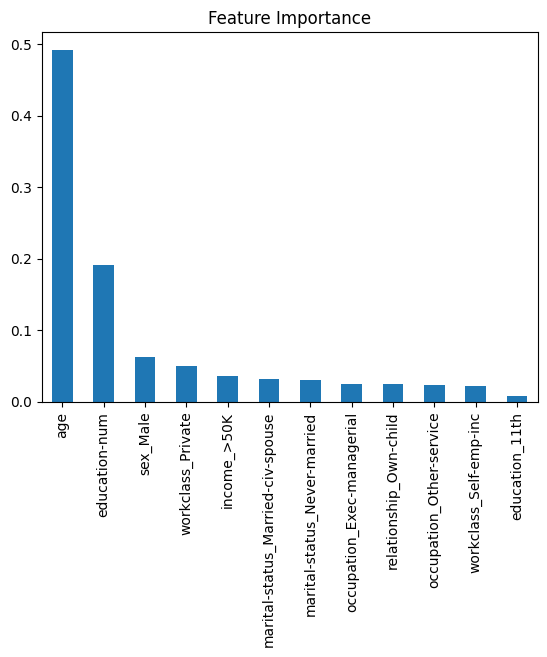

In [32]:
import matplotlib.pyplot as plt

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_selected, y_train["hours-per-week"])

importances = pd.Series(rf.feature_importances_, index=X_train_selected.columns)
importances.sort_values(ascending=False).plot(kind="bar", title="Feature Importance")
plt.show()